<a href="https://colab.research.google.com/github/Sakshi1007/MLnow_2.0/blob/main/3b_Multivariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> This notebook was created for code illustration of the `ML.now()` course


`Multivariate Linear Regression`

[Link to Download the dataset](https://www.kaggle.com/hesh97/titanicdataset-traincsv)

**Date Created**: June 13, 2021

**Author**:
Sakshi Singh

**Reach out**:
[Email](mailto:singhsakshi.7980@gmail.com)  | [LinkedIn](https://www.linkedin.com/in/sakshi-singh-1318b01ab/)


In [327]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [328]:
cd '/content/drive/MyDrive/ColabNotebooks/MLnow()'

/content/drive/MyDrive/ColabNotebooks/MLnow()


In [329]:
ls

ClaenMathData.csv    model_01.h5  univariate_MathData_2.csv
cleanedMathData.csv  train.csv


In [330]:
import os

In [331]:
import pandas as pd #working with csv or excel files
import numpy as np #working with numbers/ arrays/ tensors
import tensorflow as tf #framework
from tensorflow import keras #API / library 
import os #using os commands between the python language

In [332]:
mathData = pd.DataFrame(pd.read_csv('train.csv')) #load the csv file as dataframe

In [333]:
mathData.head(10) #print the first ten rows of the dataframe

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Data Processing

Categorical to numeric value conversion

In [334]:
mathData.shape

(891, 12)

In [335]:
mathData.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [336]:
drop_column=mathData.isnull().sum()[mathData.isnull().sum()>(35/100*mathData.shape[0])]
drop_column

Cabin    687
dtype: int64

In [337]:
drop_column.index

Index(['Cabin'], dtype='object')

In [338]:
mathData.drop(drop_column.index,axis=1,inplace=True)
mathData.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [339]:
mathData.fillna(mathData.mean(),inplace=True)
mathData.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [340]:
mathData['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [341]:
mathData['Embarked'].fillna('S',inplace=True)

In [342]:
mathData.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [343]:
print(f'Survived: {mathData.Survived.unique()}')
print(f'SEX: {mathData.Sex.unique()}')
print(f'Pclass: {mathData.Pclass.unique()}')
print(f'SibSP: {mathData.SibSp.unique()}')
print(f'Parch: {mathData.Parch.unique()}')
print(f'Embarked: {mathData.Embarked.unique()}')

Survived: [0 1]
SEX: ['male' 'female']
Pclass: [3 1 2]
SibSP: [1 0 3 4 2 5 8]
Parch: [0 1 2 5 3 4 6]
Embarked: ['S' 'C' 'Q']


In [344]:
mathData.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


In [345]:
mathData['FamilySize']=mathData['SibSp']+mathData['Parch']
mathData.drop(['SibSp','Parch'],axis=1,inplace=True)
mathData.corr()

,PassengerId,Survived,Pclass,Age,Fare,FamilySize
PassengerId,1.000000,-0.005007,-0.035144,0.033207,0.012658,-0.040143
Survived,-0.005007,1.000000,-0.338481,-0.069809,0.257307,0.016639
Pclass,-0.035144,-0.338481,1.000000,-0.331339,-0.549500,0.065997
Age,0.033207,-0.069809,-0.331339,1.000000,0.091566,-0.248512
Fare,0.012658,0.257307,-0.549500,0.091566,1.000000,0.217138
FamilySize,-0.040143,0.016639,0.065997,-0.248512,0.217138,1.000000


In [346]:
mathData['FamilySize'] = mathData['FamilySize'].apply({1:1, 0:0, 4:1, 2:1, 6:1, 5:1, 3:1, 7:1, 10:1}.get)
mathData.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,373450,8.0500,S,0
5,6,0,3,"Moran, Mr. James",male,29.699118,330877,8.4583,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,17463,51.8625,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,349909,21.0750,S,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,347742,11.1333,S,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,237736,30.0708,C,1


In [347]:
mathData['Alone']=[0 if mathData['FamilySize'][i]<=0 else 1 for i in mathData.index]
mathData.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,FamilySize,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,A/5 21171,7.2500,S,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,PC 17599,71.2833,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,STON/O2. 3101282,7.9250,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,113803,53.1000,S,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,373450,8.0500,S,0,0
5,6,0,3,"Moran, Mr. James",male,29.699118,330877,8.4583,Q,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,17463,51.8625,S,0,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,349909,21.0750,S,1,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,347742,11.1333,S,1,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,237736,30.0708,C,1,1


In [348]:
mathData.groupby(['Alone'])['Survived'].mean()

Alone
0    0.303538
1    0.505650
Name: Survived, dtype: float64

In [349]:
mathData[['Alone','Fare']].corr()

,Alone,Fare
Alone,1.000000,0.271832
Fare,0.271832,1.000000


In [350]:
mathData['Sex'] = mathData['Sex'].apply({'male':1, 'female':0}.get)
mathData['Embarked'] = mathData['Embarked'].apply({'S':1, 'C':2, 'Q':3}.get)
mathData.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,FamilySize,Alone
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,A/5 21171,7.2500,1,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,PC 17599,71.2833,2,1,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,STON/O2. 3101282,7.9250,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,113803,53.1000,1,1,1
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,373450,8.0500,1,0,0
5,6,0,3,"Moran, Mr. James",1,29.699118,330877,8.4583,3,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.000000,17463,51.8625,1,0,0
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.000000,349909,21.0750,1,1,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.000000,347742,11.1333,1,1,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,237736,30.0708,2,1,1


In [351]:
mathData.groupby(['Sex'])['Survived'].mean()

Sex
0    0.742038
1    0.188908
Name: Survived, dtype: float64

In [352]:
mathData.groupby(['Embarked'])['Survived'].mean()

Embarked
1    0.339009
2    0.553571
3    0.389610
Name: Survived, dtype: float64

In [353]:
mathData.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,FamilySize,Alone
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,A/5 21171,7.2500,1,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,PC 17599,71.2833,2,1,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,STON/O2. 3101282,7.9250,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,113803,53.1000,1,1,1
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,373450,8.0500,1,0,0
5,6,0,3,"Moran, Mr. James",1,29.699118,330877,8.4583,3,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.000000,17463,51.8625,1,0,0
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.000000,349909,21.0750,1,1,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.000000,347742,11.1333,1,1,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,237736,30.0708,2,1,1


In [354]:
print(f'Survived: {mathData.Survived.unique()}')
print(f'SEX: {mathData.Sex.unique()}')
print(f'Pclass: {mathData.Pclass.unique()}')
print(f'Alone: {mathData.Alone.unique()}')
print(f'FamilySize: {mathData.FamilySize.unique()}')
print(f'Embarked: {mathData.Embarked.unique()}')

Survived: [0 1]
SEX: [1 0]
Pclass: [3 1 2]
Alone: [1 0]
FamilySize: [1 0]
Embarked: [1 2 3]


In [383]:
#columns to be considered
mathData=mathData[['PassengerId','Pclass','Survived','Sex','Fare','FamilySize','Alone','Embarked']]
mathData.head(10)

,PassengerId,Pclass,Survived,Sex,Fare,FamilySize,Alone,Embarked
0,1,3,0,1,7.2500,1,1,1
1,2,1,1,0,71.2833,1,1,2
2,3,3,1,0,7.9250,0,0,1
3,4,1,1,0,53.1000,1,1,1
4,5,3,0,1,8.0500,0,0,1
5,6,3,0,1,8.4583,0,0,3
6,7,1,0,1,51.8625,0,0,1
7,8,3,0,1,21.0750,1,1,1
8,9,3,1,0,11.1333,1,1,1
9,10,2,1,0,30.0708,1,1,2


In [384]:
mathData.to_csv('ClaenMathData.csv') #exporting the file

In [385]:
ls

ClaenMathData.csv    model_01.h5  univariate_MathData_2.csv
cleanedMathData.csv  train.csv


In [386]:
#convert the categories into numbers 

#binary valued
#mathData['school'] = mathData['school'].apply({'GP':1, 'MS':0}.get)
#mathData['sex'] = mathData['sex'].apply({'F':1, 'M':0}.get)
#mathData['address'] = mathData['address'].apply({'U':1, 'R':0}.get)
#mathData['higher'] = mathData['higher'].apply({'yes':1, 'no':0}.get)


#multi-valued
#mathData['Mjob'] = mathData['Mjob'].apply({'at_home':1, 'health':2, 'other':3, 'services':4, 'teacher':5}.get)
#mathData['Fjob'] = mathData['Fjob'].apply({'at_home':1, 'health':2, 'other':3, 'services':4, 'teacher':5}.get)

#mathData.head(15)

In [387]:
mathData.to_csv('cleanedMathData.csv') #export the mathData as cleanedMathData as csv file

In [388]:
ls

ClaenMathData.csv    model_01.h5  univariate_MathData_2.csv
cleanedMathData.csv  train.csv


## Data Visualization

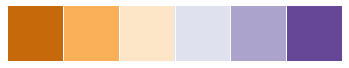

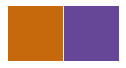

In [389]:
import seaborn as sns
sns.palplot(sns.color_palette('PuOr')) #Purple to Orange colors
pal = sns.color_palette('PuOr', 6) #print 6 color shades from Purple to Orange
pal.as_hex() #set hex code values for colors

import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
sns_colors = ['#c6690c', '#664697'] #orange Purple hex codes
sns.set_palette(sns_colors) #set the palette as sns_colors 
sns.palplot(sns.color_palette(sns_colors)) #plot the color codes

In [390]:
mathData.columns #columns in the dataframe

Index(['PassengerId', 'Pclass', 'Survived', 'Sex', 'Fare', 'FamilySize',
       'Alone', 'Embarked'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


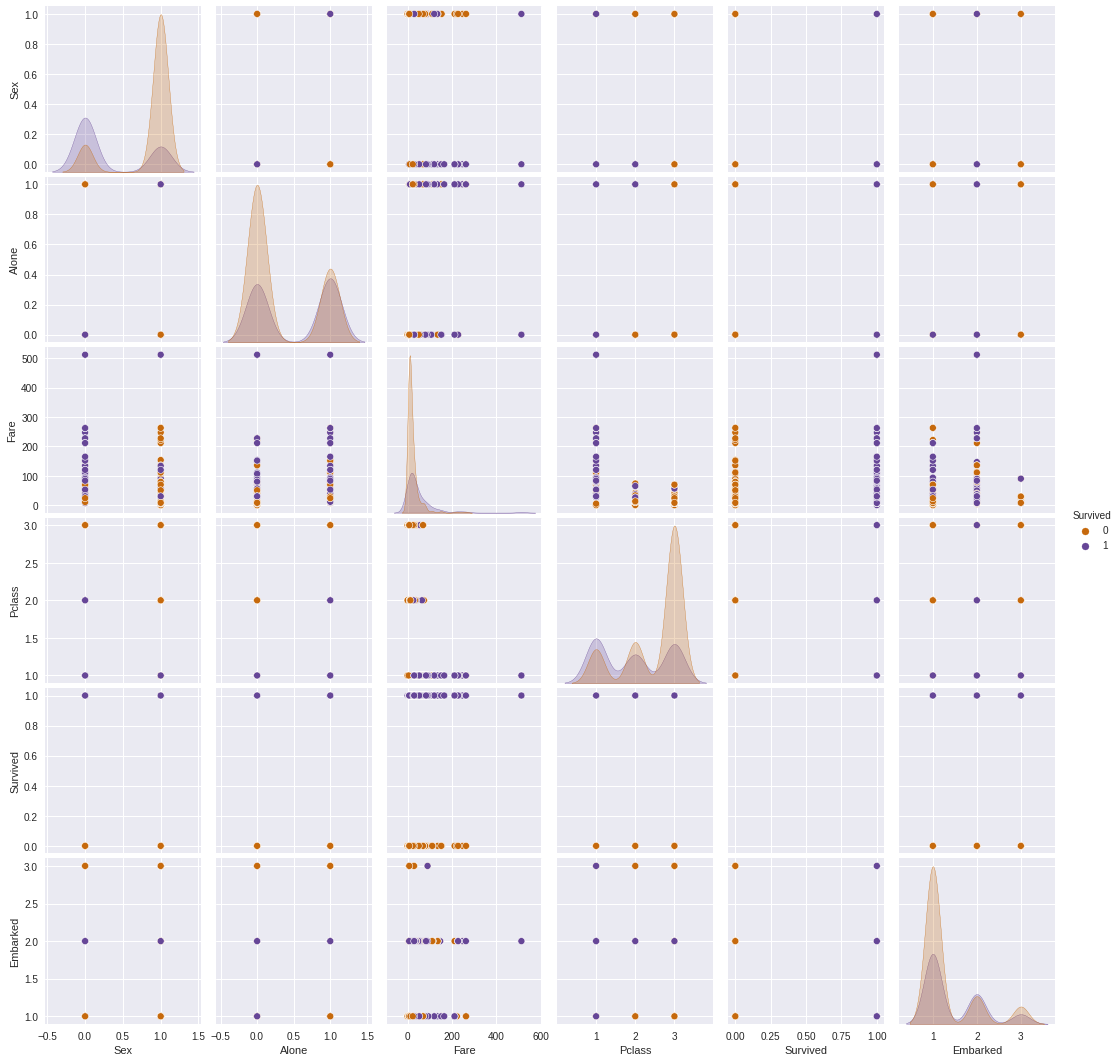

In [391]:
#pairplot for all the values

sns.pairplot(mathData,
             x_vars = ['Sex','Alone','Fare', 'Pclass','Survived','Embarked'],
             y_vars = ['Sex','Alone','Fare', 'Pclass','Survived','Embarked'],
       diag_kind='kde', hue='Survived'
             )

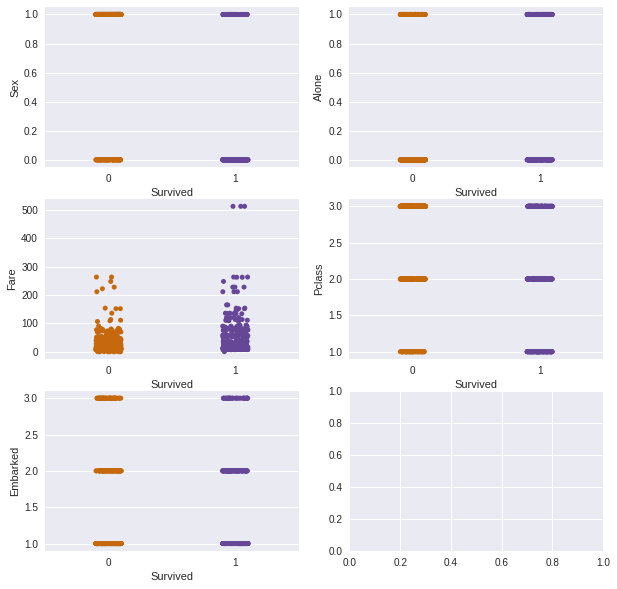

In [392]:
# stripplots plotted as subplots on one main plot with the ax parameter

fig, axarr = plt.subplots(3,2, figsize=(10,10))

sns.stripplot(y='Sex', x='Survived', data=mathData, hue=None, ax=axarr[0][0])
sns.stripplot(y='Alone', x='Survived', data=mathData, hue=None, ax=axarr[0][1])
sns.stripplot(y='Fare', x='Survived', data=mathData, hue=None, ax=axarr[1][0])
sns.stripplot(y='Pclass', x='Survived', data=mathData, hue=None,  ax=axarr[1][1])
sns.stripplot(y='Embarked', x='Survived', data=mathData, hue=None, ax=axarr[2][0])

## Data Splits

In [393]:
#80-20 train-test percent split

trainDataset = mathData.sample(frac=0.8, random_state=0) 
testDataset = mathData.drop(trainDataset.index)

print(trainDataset.head())
print(testDataset.head())

     PassengerId  Pclass  Survived  Sex      Fare  FamilySize  Alone  Embarked
495          496       3         0    1   14.4583           0      0         2
648          649       3         0    1    7.5500           0      0         1
278          279       3         0    1   29.1250           1      1         3
31            32       1         1    0  146.5208           1      1         2
255          256       3         1    0   15.2458           1      1         2
    PassengerId  Pclass  Survived  Sex     Fare  FamilySize  Alone  Embarked
9            10       2         1    0  30.0708           1      1         2
11           12       1         1    0  26.5500           0      0         1
19           20       3         1    0   7.2250           0      0         2
23           24       1         1    1  35.5000           0      0         1
28           29       3         1    0   7.8792           0      0         3


In [394]:
print(trainDataset.shape)
print(testDataset.shape)

(713, 8)
(178, 8)


In [395]:
#copy the trainDataset dataframe for getting the features

trainFeatures = trainDataset.copy()
testFeatures = testDataset.copy()

print(trainFeatures.head())
print(testFeatures.head())

     PassengerId  Pclass  Survived  Sex      Fare  FamilySize  Alone  Embarked
495          496       3         0    1   14.4583           0      0         2
648          649       3         0    1    7.5500           0      0         1
278          279       3         0    1   29.1250           1      1         3
31            32       1         1    0  146.5208           1      1         2
255          256       3         1    0   15.2458           1      1         2
    PassengerId  Pclass  Survived  Sex     Fare  FamilySize  Alone  Embarked
9            10       2         1    0  30.0708           1      1         2
11           12       1         1    0  26.5500           0      0         1
19           20       3         1    0   7.2250           0      0         2
23           24       1         1    1  35.5000           0      0         1
28           29       3         1    0   7.8792           0      0         3


In [396]:
#removing the Survived column and saving it into the labels variable

trainLabels = trainFeatures.pop('Survived')
testLabels = testFeatures.pop('Survived')

print(trainLabels.head())
print(testLabels.head())

495    0
648    0
278    0
31     1
255    1
Name: Survived, dtype: int64
9     1
11    1
19    1
23    1
28    1
Name: Survived, dtype: int64


In [397]:
print(trainFeatures.head())
print(testFeatures.head())

     PassengerId  Pclass  Sex      Fare  FamilySize  Alone  Embarked
495          496       3    1   14.4583           0      0         2
648          649       3    1    7.5500           0      0         1
278          279       3    1   29.1250           1      1         3
31            32       1    0  146.5208           1      1         2
255          256       3    0   15.2458           1      1         2
    PassengerId  Pclass  Sex     Fare  FamilySize  Alone  Embarked
9            10       2    0  30.0708           1      1         2
11           12       1    0  26.5500           0      0         1
19           20       3    0   7.2250           0      0         2
23           24       1    1  35.5000           0      0         1
28           29       3    0   7.8792           0      0         3


## Model Development

In [398]:
import math
numFeatures = len(trainFeatures.columns)
inputNeurons = math.ceil(2*(numFeatures)/3)
print(inputNeurons)

5


In [399]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(units = inputNeurons, activation = 'relu'),
                             tf.keras.layers.Dense(units = 2*inputNeurons, activation='relu'),
                             tf.keras.layers.Dense(1)
])

In [400]:
model.compile(
    loss='mean_absolute_error',
     optimizer= tf.keras.optimizers.SGD(learning_rate=0.0001,momentum=0.1,nesterov=False,name="SGD"),
    metrics=['mae','mse']
)

In [401]:
mathData.shape

(891, 8)

In [402]:
numEpochs = 2000
history = model.fit(x = trainFeatures, y = trainLabels, validation_data = (testFeatures, testLabels), epochs = numEpochs)

Epoch 1/2000
23/23 [==============================] - 1s 9ms/step - loss: 22.4620 - mae: 22.4620 - mse: 1731.9125 - val_loss: 0.4676 - val_mae: 0.4676 - val_mse: 0.3809
Epoch 2/2000
23/23 [==============================] - 0s 2ms/step - loss: 2.8794 - mae: 2.8794 - mse: 13.2811 - val_loss: 2.0032 - val_mae: 2.0032 - val_mse: 5.6053
Epoch 3/2000
23/23 [==============================] - 0s 3ms/step - loss: 2.8633 - mae: 2.8633 - mse: 12.3737 - val_loss: 1.0944 - val_mae: 1.0944 - val_mse: 1.7450
Epoch 4/2000
23/23 [==============================] - 0s 2ms/step - loss: 2.6070 - mae: 2.6070 - mse: 10.0606 - val_loss: 3.5671 - val_mae: 3.5671 - val_mse: 15.9953
Epoch 5/2000
23/23 [==============================] - 0s 3ms/step - loss: 2.5641 - mae: 2.5641 - mse: 9.7965 - val_loss: 3.4881 - val_mae: 3.4881 - val_mse: 16.7518
Epoch 6/2000
23/23 [==============================] - 0s 3ms/step - loss: 2.4185 - mae: 2.4185 - mse: 9.3659 - val_loss: 3.7773 - val_mae: 3.7773 - val_mse: 19.6024
Epoch

## Result Analysis

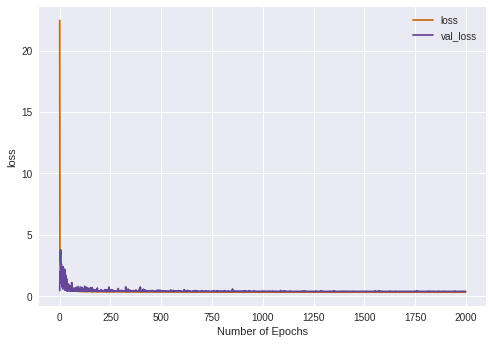

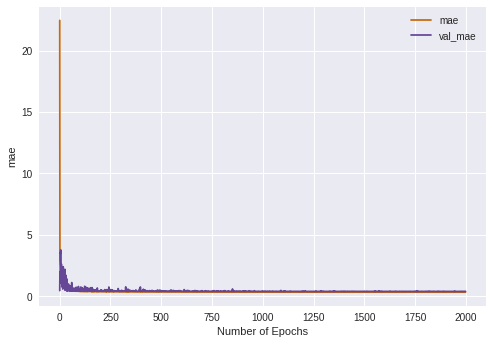

In [403]:
#Plot Functions

def pltGr(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history[f'val_{string}'])
  plt.xlabel('Number of Epochs')
  plt.ylabel(string)
  plt.legend([string, f'val_{string}'])
  plt.show()

pltGr(history, 'loss')
pltGr(history, 'mae')

In [404]:
testPreds = model.predict(testFeatures).flatten()
print(testPreds)

[ 4.68439572e-02  7.45144635e-02 -3.35227475e-02  1.21151507e-01
 -1.16276843e-02 -5.48881944e-03 -1.40320975e-03  1.55287441e-02
  8.92237294e-03  8.88549834e-02  1.81611590e-02  4.09413017e-02
  3.17067765e-02  5.10969497e-02  7.83697292e-02  2.30721429e-01
  6.04407005e-02  4.03355807e-02  9.21591595e-02  8.03817883e-02
  7.02437535e-02  7.62962028e-02  7.42337778e-02  8.28570873e-02
  1.07995786e-01  1.21751644e-01  5.89156784e-02  1.20102271e-01
  1.46831766e-01  1.32543027e-01  3.09538003e-03  5.82901761e-03
  3.17942232e-01  1.80843065e-03  1.68274254e-01  1.99008152e-01
  2.79920489e-01  2.62435853e-01  3.10143560e-01  3.04013997e-01
  2.65978307e-01  2.27862284e-01  2.71071702e-01  2.10574701e-01
  3.24842008e-03  4.41439496e-03  3.07371855e-01  3.43939709e-03
  3.65721583e-01  7.59233860e-03  4.24447283e-03  3.94929480e-03
  4.22902554e-01  4.94127691e-01  4.95354295e-01  4.10388876e-03
  8.07731599e-03  5.78073442e-01  3.18896174e-01  4.90175158e-01
 -5.98478713e-04  4.35261

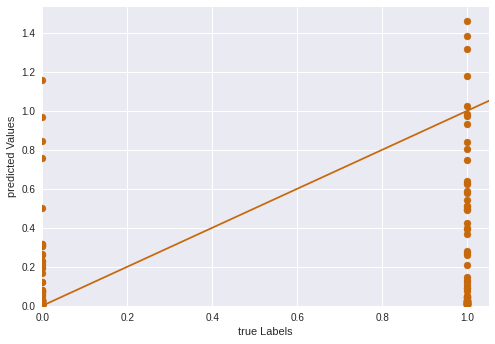

In [405]:
def predPlot(labels,preds):
  plt.scatter(labels, preds)
  plt.xlabel('true Labels')
  plt.ylabel('predicted Values')
  plt.xlim([0, plt.xlim()[1]])
  plt.ylim([0, plt.ylim()[1]])
  plt.plot([-100, 100], [-100,100])
  plt.show()

predPlot(testLabels, testPreds)

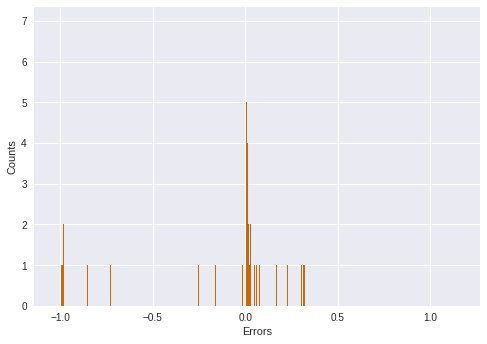

In [406]:
def errorPlot(preds, labels, counts):
  errors = testPreds - testLabels
  plt.hist(errors, counts)
  plt.ylabel('Counts')
  plt.xlabel('Errors')
  plt.show()

errorPlot(testPreds, testLabels, numEpochs)

## Saving Models

In [407]:
import os
modelName = f'model_01.h5'
model.save(f'{os.getcwd()}/{modelName}')

In [408]:
model = tf.keras.models.load_model(f'{os.getcwd()}/{modelName}')

In [409]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 5)                 40        
_________________________________________________________________
dense_19 (Dense)             (None, 10)                60        
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 11        
Total params: 111
Trainable params: 111
Non-trainable params: 0
_________________________________________________________________
